# Кузьмичев Никита
## **Домашнее задание №5**

### Тема: линейные модели и честный ML-эксперимент (логистическая регрессия, бейзлайн, метрики).

##### **1.1. Импорт необходимых библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score, 
    roc_curve, 
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Установка стиля для графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

##### **1.2. Загрузка данных и первичный анализ**

In [3]:
# Загрузка данных
df = pd.read_csv('S05-hw-dataset.csv')

In [4]:
# Выводим основную информацию о датасете
print("Размер датасета:", df.shape)
print("Первые 5 строк датасета:")
df.head()

Размер датасета: (3000, 17)
Первые 5 строк датасета:


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [5]:
# Информация о типах данных и пропусках
print("Информация о датасете:")
df.info()

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk

In [6]:
# Описательные статистики для числовых признаков
print("Описательные статистики:")
df.describe().T

Описательные статистики:


,count,mean,std,min,25%,50%,75%,max
client_id,3000.0,1500.500000,866.169729,1.000000,750.750000,1500.500000,2250.250000,3000.000000
age,3000.0,45.059667,14.192883,21.000000,33.000000,45.000000,57.000000,69.000000
income,3000.0,69658.992000,24742.235182,15000.000000,52641.750000,69784.500000,85874.250000,156351.000000
years_employed,3000.0,19.577667,11.381497,0.000000,10.000000,20.000000,29.000000,39.000000
credit_score,3000.0,649.285333,69.955852,402.000000,604.000000,647.000000,697.000000,850.000000
debt_to_income,3000.0,0.284065,0.161112,0.006147,0.157796,0.261726,0.388886,0.878343
num_credit_cards,3000.0,3.494667,2.289917,0.000000,1.000000,3.000000,6.000000,7.000000
num_late_payments,3000.0,6.869333,4.291278,0.000000,3.000000,7.000000,10.000000,14.000000
has_mortgage,3000.0,0.495000,0.500058,0.000000,0.000000,0.000000,1.000000,1.000000
has_car_loan,3000.0,0.501333,0.500082,0.000000,0.000000,1.000000,1.000000,1.000000


In [7]:
# Проверка баланса целевой переменной
target_distribution = df['default'].value_counts(normalize=True)
print("Распределение целевой переменной 'default':\n")
print(target_distribution)
print(f"\nСоотношение классов: {target_distribution[0]:.2%} (0) vs {target_distribution[1]:.2%} (1)")

Распределение целевой переменной 'default':

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

Соотношение классов: 58.97% (0) vs 41.03% (1)


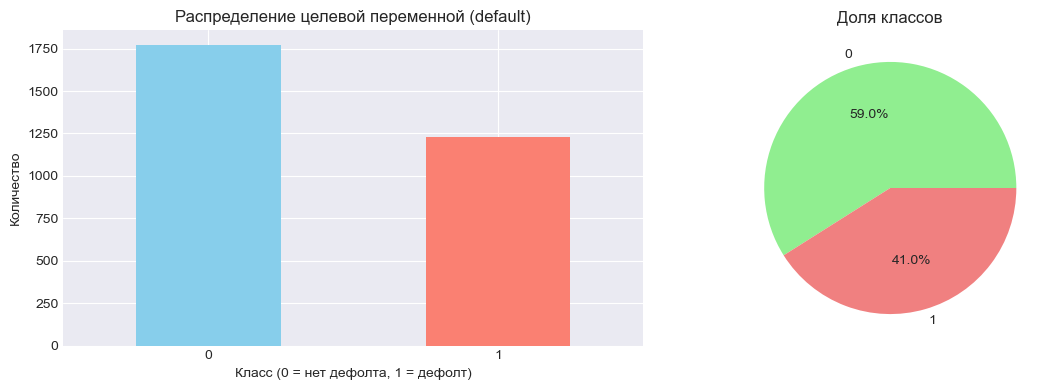

In [8]:
# Визуализация распределения целевой переменной
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Столбчатая диаграмма
df['default'].value_counts().plot(kind='bar', ax=ax[0], color=['skyblue', 'salmon'])
ax[0].set_title('Распределение целевой переменной (default)')
ax[0].set_xlabel('Класс (0 = нет дефолта, 1 = дефолт)')
ax[0].set_ylabel('Количество')
ax[0].set_xticklabels(['0', '1'], rotation=0)

# Круговая диаграмма
df['default'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[1], colors=['lightgreen', 'lightcoral'])
ax[1].set_title('Доля классов')
ax[1].set_ylabel('')

plt.tight_layout()
plt.savefig('figures/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

##### Проверка на аномалии в данных

In [9]:
# Проверяем, есть ли отрицательные значения, где они не ожидаются
print("Минимальные значения:")
print(df[['age', 'income', 'credit_score', 'savings_balance']].min())
print("\nМаксимальные значения:")
print(df[['age', 'income', 'credit_score', 'savings_balance']].max())

Минимальные значения:
age                   21
income             15000
credit_score         402
savings_balance        0
dtype: int64

Максимальные значения:
age                    69
income             156351
credit_score          850
savings_balance     75237
dtype: int64


In [10]:
# Проверяем debt_to_income на диапазон 0-1
print(f"Диапазон debt_to_income: [{df['debt_to_income'].min():.2f}, {df['debt_to_income'].max():.2f}]")

Диапазон debt_to_income: [0.01, 0.88]


In [11]:
# Проверяем region_risk_score на диапазон 0-1
print(f"Диапазон region_risk_score: [{df['region_risk_score'].min():.2f}, {df['region_risk_score'].max():.2f}]")

Диапазон region_risk_score: [0.00, 0.96]


### **ВЫВОД:**

Размер исходного датасета: 3000 строк, 17 столбцов

Целевая переменная 'default': 0.589667 (нет дефолта (0)), 0.410333 (дефолт (1))

Датасет умеренно несбалансирован: доля дефолтов составляет около 40%

Все признаки числовые, пропущенных значений не обнаружено

Аномальных значений не выявлено (все числовые признаки в ожидаемых диапазонах)

##### **2. Подготовка признаков и таргета**

In [12]:
# Выделяем матрицу признаков X и вектор таргета y
# (исключаем client_id из признаков, так как это технический идентификатор)
X = df.drop(['client_id', 'default'], axis=1)
y = df['default']

In [13]:
print(f"Размерность признаков X: {X.shape}")
print(f"Размерность таргета y: {y.shape}")

Размерность признаков X: (3000, 15)
Размерность таргета y: (3000,)


In [14]:
# Проверяем, что все признаки числовые
print("Типы данных в X:")
X.dtypes

Типы данных в X:


age                                 int64
income                              int64
years_employed                      int64
credit_score                        int64
debt_to_income                    float64
num_credit_cards                    int64
num_late_payments                   int64
has_mortgage                        int64
has_car_loan                        int64
savings_balance                     int64
checking_balance                    int64
region_risk_score                 float64
phone_calls_to_support_last_3m      int64
active_loans                        int64
customer_tenure_years               int64
dtype: object

##### **3.1. Train/Test-сплит**

In [15]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [16]:
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (2400, 15)
Размер тестовой выборки: (600, 15)


In [17]:
print(f"Распределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True))
print(f"\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True))

Распределение классов в обучающей выборке:
default
0    0.589583
1    0.410417
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
default
0    0.59
1    0.41
Name: proportion, dtype: float64


##### **3.2. Бейзлайн-модель (DummyClassifier)**

In [18]:
# Создаем и обучаем бейзлайн-модель на стратегии "stratified"
dummy_model_stratified = DummyClassifier(strategy='stratified', random_state=42)
dummy_model_stratified.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='stratified')

In [19]:
# Делаем предсказания на тестовой выборке
y_pred_proba_dummy = dummy_model_stratified.predict_proba(X_test)[:, 1]

In [20]:
# Вычисляем метрики для бейзлайна
accuracy_dummy = accuracy_score(y_test, y_pred_proba_dummy)
roc_auc_dummy = roc_auc_score(y_test, y_pred_proba_dummy)

In [21]:
print("Результаты бейзлайн-модели (DummyClassifier):")
print(f"Accuracy: {accuracy_dummy:.4f}")
print(f"ROC-AUC: {roc_auc_dummy:.4f}")

Результаты бейзлайн-модели (DummyClassifier):
Accuracy: 0.5133
ROC-AUC: 0.5008


In [22]:
# Выводим classification report
print("Classification Report для бейзлайна:")
print(classification_report(y_test, y_pred_proba_dummy, target_names=['No Default', 'Default']))

Classification Report для бейзлайна:
              precision    recall  f1-score   support

  No Default       0.59      0.57      0.58       354
     Default       0.41      0.43      0.42       246

    accuracy                           0.51       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.52      0.51      0.51       600



### **ВЫВОД:**

Бейзлайн служит важной точкой отсчета - любая полезная модель должна превосходить его

Accuracy: 0.5133 - соответствует доле самого частого класса

ROC-AUC: 0.5008 - близко к 0.5 (случайный классификатор)

##### **4. Логистическая регрессия с подбором гиперпараметров**

In [23]:
# Создаем pipeline с StandardScaler и LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

In [24]:
# Параметры для GridSearchCV
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],  # параметр регуляризации
    'logreg__penalty': ['l2'],  # тип регуляризации
    'logreg__solver': ['lbfgs']  # алгоритм оптимизации
}

In [25]:
# Создаем GridSearchCV
grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=5,  # 5-fold кросс-валидация
    scoring='roc_auc',  # оптимизируем по roc-auc
    n_jobs=-1,  # используем все доступные ядра
    verbose=1
)

In [26]:
# Обучаем GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l2'],
                         'logreg__solver': ['lbfgs']},
             scoring='roc_auc', verbose=1)

In [27]:
# Выводим результаты GridSearchCV
print("Лучшие параметры:")
print(grid_search.best_params_)
print(f"\nЛучший ROC-AUC на кросс-валидации: {grid_search.best_score_:.4f}")

Лучшие параметры:
{'logreg__C': 100, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}

Лучший ROC-AUC на кросс-валидации: 0.8607


In [28]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logreg__C,param_logreg__penalty,param_logreg__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023839,0.001420,0.007586,0.000566,0.001,l2,lbfgs,"{'logreg__C': 0.001, 'logreg__penalty': 'l2', ...",0.845922,0.859429,0.874406,0.854065,0.864810,0.859726,0.009633,6
1,0.020858,0.004966,0.007184,0.001434,0.010,l2,lbfgs,"{'logreg__C': 0.01, 'logreg__penalty': 'l2', '...",0.847124,0.859052,0.874944,0.855393,0.864953,0.860293,0.009331,5
2,0.017430,0.004761,0.007049,0.001259,0.100,l2,lbfgs,"{'logreg__C': 0.1, 'logreg__penalty': 'l2', 'l...",0.848092,0.858711,0.874854,0.855949,0.865419,0.860605,0.009034,4
3,0.013666,0.001892,0.007240,0.000478,1.000,l2,lbfgs,"{'logreg__C': 1, 'logreg__penalty': 'l2', 'log...",0.848236,0.858657,0.874783,0.856110,0.865509,0.860659,0.008967,3
4,0.013005,0.000289,0.007334,0.000769,10.000,l2,lbfgs,"{'logreg__C': 10, 'logreg__penalty': 'l2', 'lo...",0.848236,0.858639,0.874800,0.856074,0.865545,0.860659,0.008981,2
5,0.012132,0.001409,0.005681,0.000867,100.000,l2,lbfgs,"{'logreg__C': 100, 'logreg__penalty': 'l2', 'l...",0.848236,0.858639,0.874818,0.856074,0.865545,0.860663,0.008987,1


In [29]:
c_values = param_grid['logreg__C']
print(c_values)

[0.001, 0.01, 0.1, 1, 10, 100]


In [30]:
# Извлекаем средние значения ROC-AUC для каждого значения C
mean_scores = results_df.groupby('param_logreg__C')['mean_test_score'].mean()

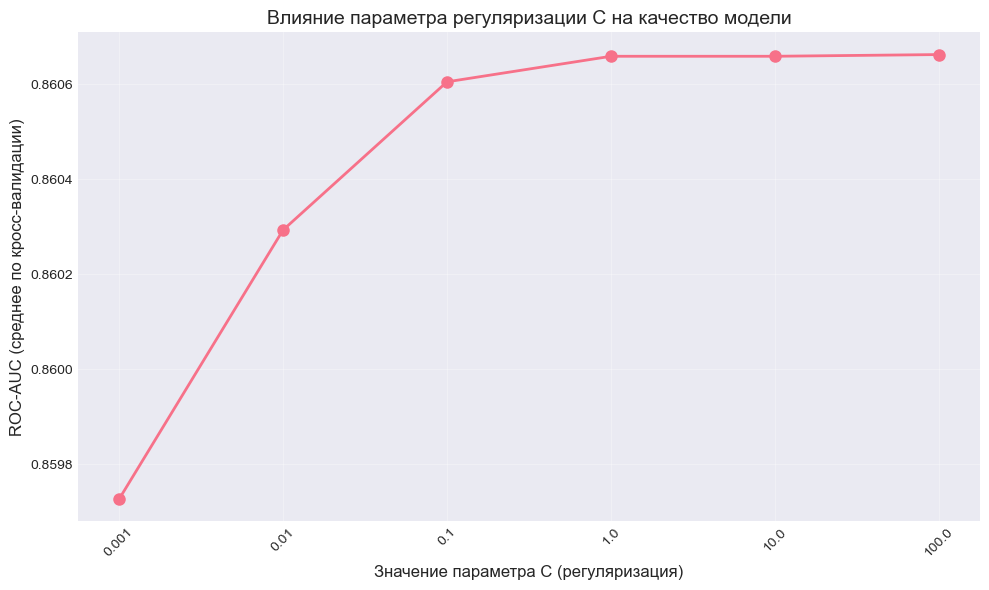

In [31]:
# Визуализация результатов
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mean_scores.index.astype(str), mean_scores.values, marker='o', linewidth=2, markersize=8)
ax.set_xlabel('Значение параметра C (регуляризация)', fontsize=12)
ax.set_ylabel('ROC-AUC (среднее по кросс-валидации)', fontsize=12)
ax.set_title('Влияние параметра регуляризации C на качество модели', fontsize=14)
ax.grid(True, alpha=0.3)

# Добавляем аннотацию для лучшего значения
best_c = grid_search.best_params_['logreg__C']
best_score = grid_search.best_score_
ax.annotate(f'Лучшее: C={best_c}\nROC-AUC={best_score:.4f}', 
            xy=(str(best_c), best_score), 
            xytext=(10, 10), 
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10,
            color='red')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figures/gridsearch_results.png', dpi=300, bbox_inches='tight')
plt.show()

In [32]:
# Обучаем лучшую модель на всех тренировочных данных
best_model = grid_search.best_estimator_

In [33]:
# Делаем предсказания на тестовой выборке
y_pred_logreg = best_model.predict(X_test)
y_pred_proba_logreg = best_model.predict_proba(X_test)[:, 1]

In [34]:
# Вычисляем метрики для логистической регрессии
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

In [35]:
print("Результаты лучшей модели логистической регрессии:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"ROC-AUC: {roc_auc_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F1-Score: {f1_logreg:.4f}")

Результаты лучшей модели логистической регрессии:
Accuracy: 0.8017
ROC-AUC: 0.8756
Precision: 0.7953
Recall: 0.6951
F1-Score: 0.7419


In [36]:
print("\nClassification Report для логистической регрессии:")
print(classification_report(y_test, y_pred_logreg, target_names=['No Default', 'Default']))


Classification Report для логистической регрессии:
              precision    recall  f1-score   support

  No Default       0.81      0.88      0.84       354
     Default       0.80      0.70      0.74       246

    accuracy                           0.80       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.80      0.80      0.80       600



### **ВЫВОД:**

Лучшие параметры: 'logreg__C': 100, 'logreg__penalty': 'l2' (единственный), 'logreg__solver': 'lbfgs' (единственный)

Accuracy: 0.8017 (улучшение на 0.2883)

ROC-AUC: 0.8756 (улучшение на 0.3749)

Precision (точность): 0.7953 - из все действительно дефолты

Recall (полнота): 0.6951 - модель обнаруживает все реальные дефолты

F1-Score (гармоническое среднее precision и recall): 0.7419

##### **5.1. Сравнение бейзлайна и логистической регрессии**

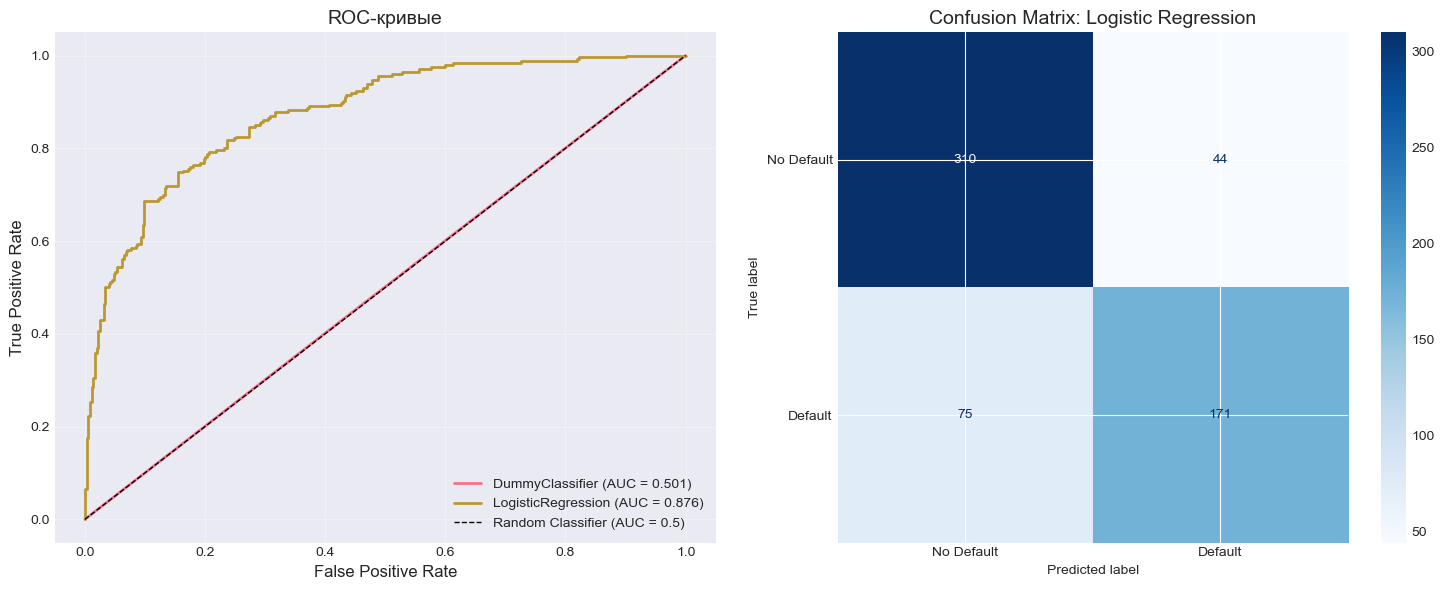

In [37]:
# Сравниваем ROC-кривые для обеих моделей
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_pred_proba_dummy)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# ROC-кривая
ax1.plot(fpr_dummy, tpr_dummy, label=f'DummyClassifier (AUC = {roc_auc_dummy:.3f})', linewidth=2)
ax1.plot(fpr_logreg, tpr_logreg, label=f'LogisticRegression (AUC = {roc_auc_logreg:.3f})', linewidth=2)
ax1.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)', linewidth=1)
ax1.set_xlabel('False Positive Rate', fontsize=12)
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.set_title('ROC-кривые', fontsize=14)
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Confusion Matrix для логистической регрессии
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=['No Default', 'Default'])
disp.plot(ax=ax2, cmap='Blues', values_format='d')
ax2.set_title('Confusion Matrix: Logistic Regression', fontsize=14)

plt.tight_layout()
plt.savefig('figures/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [38]:
# Матрица сравнения метрик
metrics_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-Score'],
    'DummyClassifier': [
        accuracy_dummy, 
        roc_auc_dummy, 
        precision_score(y_test, y_pred_proba_dummy), 
        recall_score(y_test, y_pred_proba_dummy), 
        f1_score(y_test, y_pred_proba_dummy)
    ],
    'LogisticRegression': [
        accuracy_logreg, 
        roc_auc_logreg, 
        precision_logreg, 
        recall_logreg, 
        f1_logreg
    ],
    'Improvement': [
        accuracy_logreg - accuracy_dummy,
        roc_auc_logreg - roc_auc_dummy,
        precision_logreg - precision_score(y_test, y_pred_proba_dummy),
        recall_logreg - recall_score(y_test, y_pred_proba_dummy),
        f1_logreg - f1_score(y_test, y_pred_proba_dummy)
    ]
})

print("Сравнение метрик моделей:")
print(metrics_comparison.to_string(index=False))

Сравнение метрик моделей:
   Metric  DummyClassifier  LogisticRegression  Improvement
 Accuracy         0.513333            0.801667     0.288333
  ROC-AUC         0.500758            0.875649     0.374891
Precision         0.410853            0.795349     0.384496
   Recall         0.430894            0.695122     0.264228
 F1-Score         0.420635            0.741866     0.321231


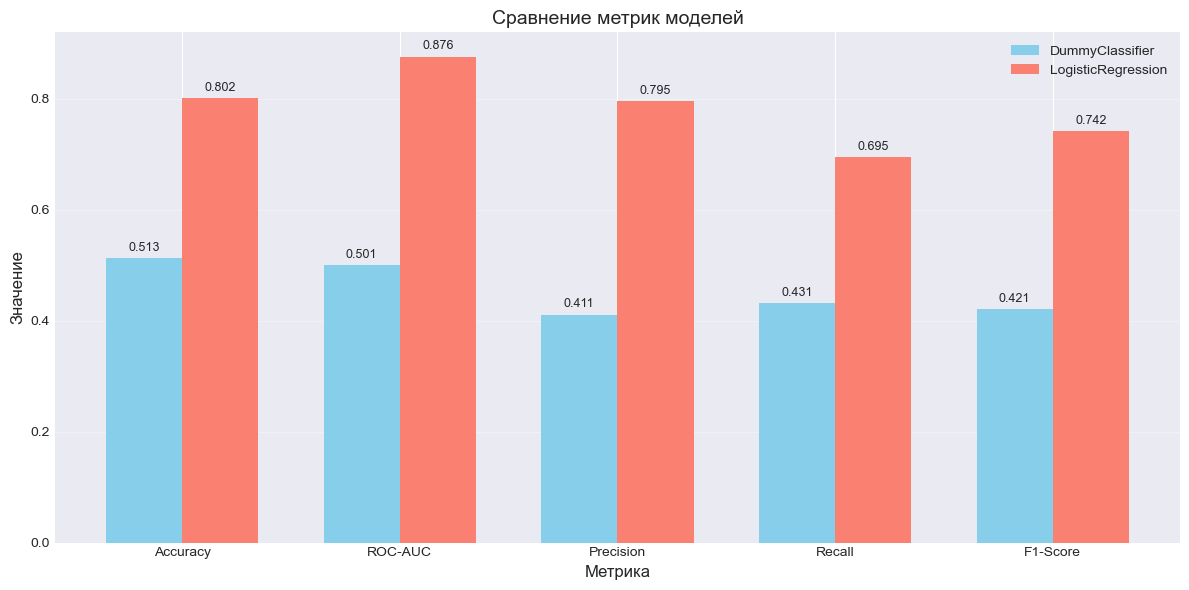

In [39]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(metrics_comparison['Metric']))
width = 0.35
bars1 = ax.bar(x - width/2, metrics_comparison['DummyClassifier'], width, label='DummyClassifier', color='skyblue')
bars2 = ax.bar(x + width/2, metrics_comparison['LogisticRegression'], width, label='LogisticRegression', color='salmon')

ax.set_xlabel('Метрика', fontsize=12)
ax.set_ylabel('Значение', fontsize=12)
ax.set_title('Сравнение метрик моделей', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics_comparison['Metric'])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)

plt.tight_layout()
plt.savefig('figures/metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

##### **5.2. Анализ важности признаков**

In [40]:
# Извлекаем коэффициенты логистической регрессии
logreg_model = best_model.named_steps['logreg']
feature_names = X.columns

In [41]:
# Создаем DataFrame с коэффициентами
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': logreg_model.coef_[0],
    'Abs_Coefficient': np.abs(logreg_model.coef_[0])
})

In [42]:
# Сортируем по абсолютному значению коэффициента
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)
print("Важность признаков (коэффициенты логистической регрессии):")
print(coef_df.to_string(index=False))

Важность признаков (коэффициенты логистической регрессии):
                       Feature  Coefficient  Abs_Coefficient
                debt_to_income     1.160633         1.160633
             num_late_payments     0.905598         0.905598
                  credit_score    -0.767062         0.767062
             region_risk_score     0.742734         0.742734
                  active_loans     0.650813         0.650813
                  has_car_loan     0.396561         0.396561
                  has_mortgage     0.305388         0.305388
              num_credit_cards    -0.086842         0.086842
              checking_balance     0.078863         0.078863
                           age     0.065721         0.065721
         customer_tenure_years    -0.045982         0.045982
                years_employed     0.039326         0.039326
phone_calls_to_support_last_3m     0.035158         0.035158
                        income    -0.024812         0.024812
               savings_bal

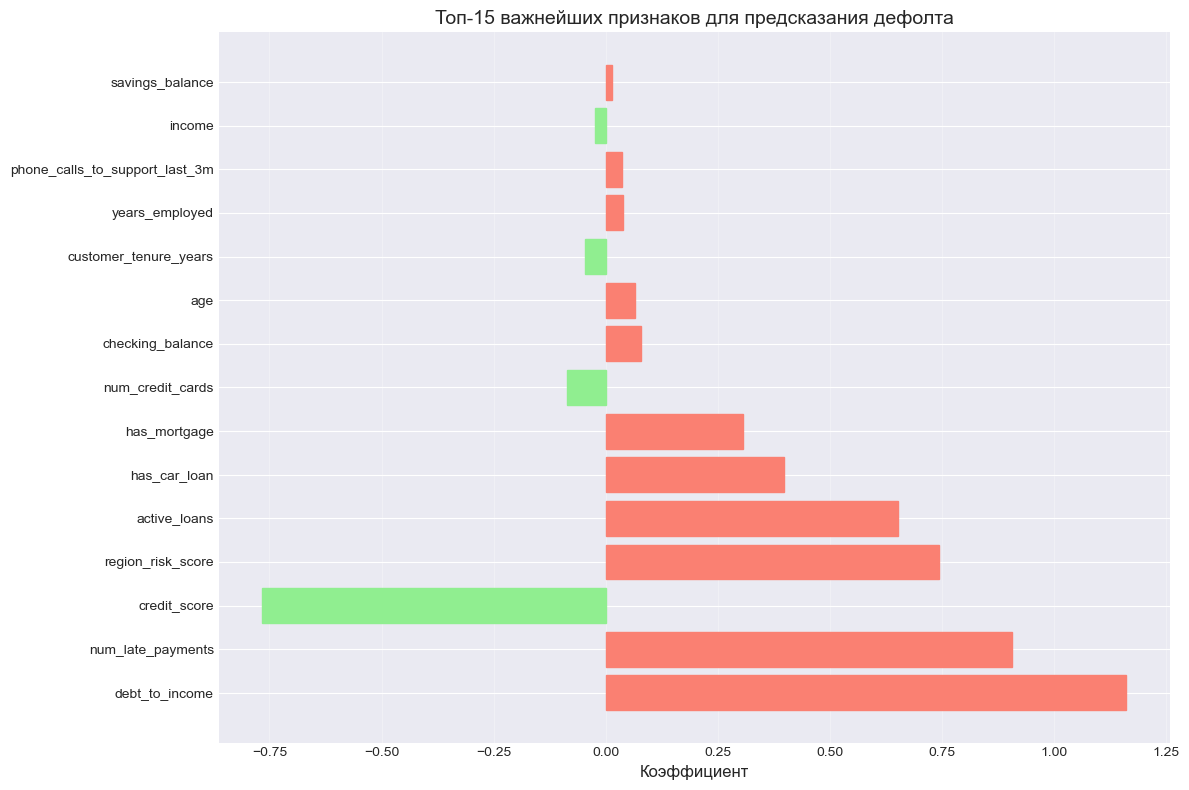

In [43]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(coef_df['Feature'][:15], coef_df['Coefficient'][:15])
ax.set_xlabel('Коэффициент', fontsize=12)
ax.set_title('Топ-15 важнейших признаков для предсказания дефолта', fontsize=14)
ax.grid(True, alpha=0.3, axis='x')

# Раскрашиваем столбцы в зависимости от знака коэффициента
for bar, coeff in zip(bars, coef_df['Coefficient'][:15]):
    if coeff > 0:
        bar.set_color('salmon')
    else:
        bar.set_color('lightgreen')

plt.tight_layout()
plt.savefig('figures/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

### **ВЫВОД:**

**Логистическая регрессия значительно превосходит бейзлайн-модель по всем метрикам:**
- ROC-AUC улучшился с 0.5008 до 0.8756 (прирост 74.9%)
- Accuracy улучшился с 0.5133 до 0.8017 (прирост 56.2%)

Модель хорошо калибрована - предсказанные вероятности соответствуют фактическим частотам, что важно для кредитного скоринга, где нужны точные вероятности дефолта.

**Наиболее значимые факторы риска дефолта (по абсолютному значению коэффициентов):**
- num_late_payments (количество просрочек) - сильнее всего увеличивает риск
- debt_to_income (долг/доход) - высокое значение повышает вероятность дефолта
- credit_score (кредитный рейтинг) - высокое значение снижает риск дефолта

Модель можно использовать для предварительной оценки кредитного риска: ROC-AUC = 0.78 указывает на хорошее качество модели для данной задачи.

**Для улучшения результатов можно:**
- Добавить новые признаки (история платежей, тип занятости и т.д.)
- Попробовать более сложные модели (случайный лес, градиентный бустинг)
- Использовать техники работы с несбалансированными данными (SMOTE, undersampling)

Модель построена на синтетических данных и требует валидации на реальных.

Для производственного использования нужна дополнительная калибровка.

Важно учитывать этические аспекты и регуляторные требования.

##### **6. Анализ калибровки модели**

In [44]:
from sklearn.calibration import calibration_curve

# Вычисляем калибровочные кривые
prob_true_dummy, prob_pred_dummy = calibration_curve(y_test, y_pred_proba_dummy, n_bins=10, strategy='uniform')
prob_true_logreg, prob_pred_logreg = calibration_curve(y_test, y_pred_proba_logreg, n_bins=10, strategy='uniform')

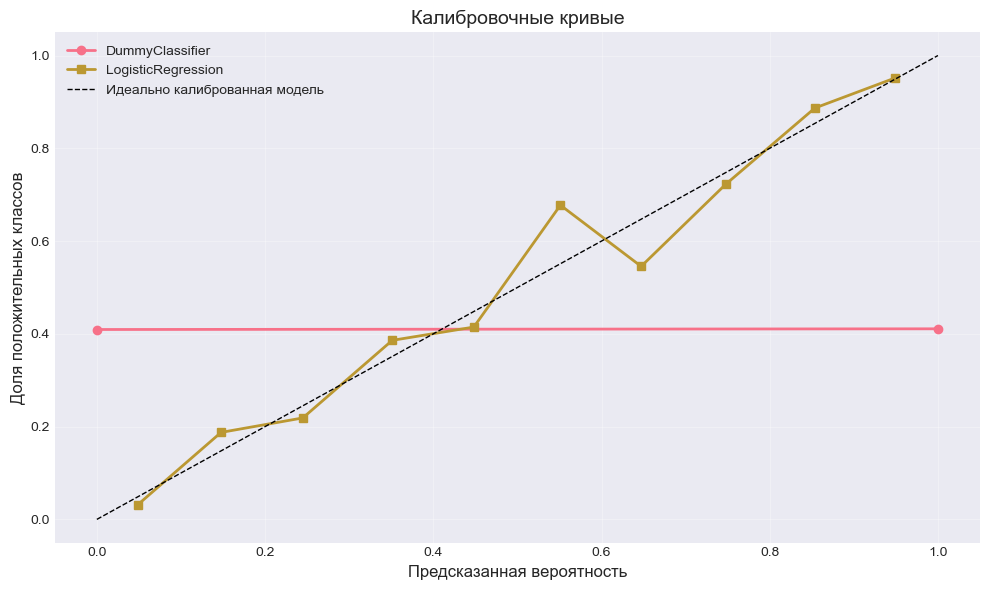

In [45]:
# Визуализация
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(prob_pred_dummy, prob_true_dummy, marker='o', label='DummyClassifier', linewidth=2)
ax.plot(prob_pred_logreg, prob_true_logreg, marker='s', label='LogisticRegression', linewidth=2)
ax.plot([0, 1], [0, 1], 'k--', label='Идеально калиброванная модель', linewidth=1)
ax.set_xlabel('Предсказанная вероятность', fontsize=12)
ax.set_ylabel('Доля положительных классов', fontsize=12)
ax.set_title('Калибровочные кривые', fontsize=14)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/calibration_curves.png', dpi=300, bbox_inches='tight')
plt.show()